In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Flatten, Reshape
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras import regularizers, metrics
import numpy as np
import keras.layers
import keras.losses

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import sklearn
from sklearn.decomposition import PCA

Using TensorFlow backend.


In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
# xtrain=xtrain()
maxV = float(xtrain.max())
xtrain=xtrain.astype('float32')/maxV
xtrain=np.reshape(xtrain, (len(xtrain), np.prod(xtrain.shape[1:])))

xtest=xtest.astype('float32')/maxV
xtest=np.reshape(xtest, (len(xtest), np.prod(xtest.shape[1:])))
# print(xtest[0].shape)

In [3]:
digits=list(set(ytrain[:100]))
count=0
index=0
arr=[]
lab=[]
for d in digits:
    count=0
    index=0
    while count<100:
        if(ytrain[index]==d):
            arr.append(xtrain[index])
            lab.append(ytrain[index])
            count+=1
        index+=1
arr=np.asarray(arr)
lab=np.asarray(lab)
print(arr.shape)
print(lab.shape)

(1000, 784)
(1000,)


In [4]:
##Introducing PCA

N=[2, 5, 10]

pca_1 = PCA(n_components=N[0])
pca_2 = PCA(n_components=N[1])
pca_3 = PCA(n_components=N[2])

In [5]:
t_1 = pca_1.fit_transform(arr)
t_2 = pca_2.fit_transform(arr)
t_3 = pca_3.fit_transform(arr)

In [6]:
# print(t_1[0])

In [7]:
k=50
knn_1 = KNeighborsClassifier(n_neighbors=k)
knn_2 = KNeighborsClassifier(n_neighbors=k)
knn_3 = KNeighborsClassifier(n_neighbors=k)

knn_1.fit(t_1, lab)
knn_2.fit(t_2, lab)
knn_3.fit(t_3, lab)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')

In [8]:
pred_lab_1=[]
pred_lab_2=[]
pred_lab_3=[]
pred_1_score=0
pred_2_score=0
pred_3_score=0
for i in range(len(t_1)):
    pred_lab_1.append(knn_1.predict([t_1[i]])[0])
    pred_lab_2.append(knn_2.predict([t_2[i]])[0])
    pred_lab_3.append(knn_3.predict([t_3[i]])[0])
    
pred_lab_1=np.asarray(pred_lab_1)
pred_lab_2=np.asarray(pred_lab_2)
pred_lab_3=np.asarray(pred_lab_3)

pred_1_score=knn_1.score(t_1, lab)
pred_2_score=knn_2.score(t_2, lab)
pred_3_score=knn_3.score(t_3, lab)
print("Accuracy of N:2 -> ",pred_1_score*100, "%")
print("Accuracy of N:5 -> ",pred_2_score*100, "%")
print("Accuracy of N:10 -> ",pred_3_score*100, "%")

acc=[1-pred_1_score, 1-pred_2_score, 1-pred_3_score]

Accuracy of N:2 ->  49.8 %
Accuracy of N:5 ->  74.3 %
Accuracy of N:10 ->  81.39999999999999 %


In [9]:
print("\n\t\t\tScore -> N = 2\n")
print(classification_report(lab, pred_lab_1))


			Score -> N = 2

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       100
           1       0.70      0.93      0.80       100
           2       0.34      0.18      0.24       100
           3       0.60      0.41      0.49       100
           4       0.41      0.55      0.47       100
           5       0.33      0.38      0.35       100
           6       0.49      0.52      0.50       100
           7       0.50      0.34      0.40       100
           8       0.45      0.54      0.49       100
           9       0.36      0.34      0.35       100

   micro avg       0.50      0.50      0.50      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.49      0.50      0.49      1000



In [10]:
print("\n\t\t\tScore -> N = 5\n")
print(classification_report(lab, pred_lab_2))


			Score -> N = 5

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       100
           1       0.71      0.96      0.81       100
           2       0.83      0.73      0.78       100
           3       0.70      0.71      0.71       100
           4       0.67      0.72      0.69       100
           5       0.67      0.61      0.64       100
           6       0.86      0.79      0.82       100
           7       0.78      0.74      0.76       100
           8       0.70      0.69      0.69       100
           9       0.70      0.62      0.66       100

   micro avg       0.74      0.74      0.74      1000
   macro avg       0.75      0.74      0.74      1000
weighted avg       0.75      0.74      0.74      1000



In [11]:
print("\n\t\t\tScore -> N = 10\n")
print(classification_report(lab, pred_lab_3))


			Score -> N = 10

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       100
           1       0.71      0.97      0.82       100
           2       0.97      0.69      0.81       100
           3       0.75      0.75      0.75       100
           4       0.81      0.83      0.82       100
           5       0.72      0.71      0.71       100
           6       0.88      0.87      0.87       100
           7       0.86      0.84      0.85       100
           8       0.85      0.84      0.84       100
           9       0.76      0.76      0.76       100

   micro avg       0.81      0.81      0.81      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.82      0.81      0.81      1000



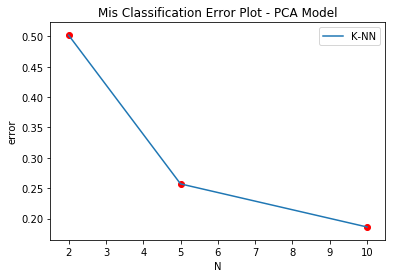

In [13]:
plt.figure()
plt.plot(N, acc)
plt.scatter(N, acc, c='red')
plt.title('Mis Classification Error Plot - PCA Model')
plt.ylabel('error')
plt.xlabel('N')
plt.legend(['K-NN'], loc='upper right')
plt.show()

In [16]:
print(acc)

#Borrowing metrics from PCA
encoder_acc=[0.78, 0.638, 0.558]

[0.502, 0.257, 0.18600000000000005]


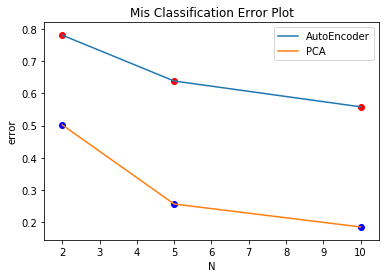

In [20]:
plt.figure()
plt.plot(N, encoder_acc)
plt.plot(N, acc)
plt.scatter(N, encoder_acc, c='red')
plt.scatter(N, acc, c='blue')
plt.title('Mis Classification Error Plot')
plt.ylabel('error')
plt.xlabel('N')
plt.legend(['AutoEncoder', 'PCA'], loc='upper right')
plt.show()